In [1]:
from datasets import load_dataset
import pandas as pd
import spacy
from tqdm.notebook import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt


dataset = load_dataset("clarin-knext/fiqa-pl", 'corpus')['corpus'].to_pandas()

## Zadanie 2

In [2]:
# wybieram 1000 losowych dokuemntów
df_random = dataset.sample(n=1000)
print(len(df_random))

1000


# Zadanie 3

In [3]:
# funkcja do dodawania do słownika klucza
def add_to_frequency_dict(dict, key):
    if key in dict:
        dict[key] += 1
    else:
        dict[key] = 1

# tworzę listę frekwencyjną named-entities
frequency_dict = {}
nlp = spacy.load('pl_core_news_sm')
for document in tqdm(df_random.iloc, desc = "Processing: ", total=len(df_random)):   
    doc = nlp(document.text)
    # iteruję po zdaniach dla danego dokumentu
    for sentence in doc.sents:
        # sequence to akumulator, do którego dodaję kolejne części sekwencyjnego named-entity(takiego który składa się z więcej niż 1 członu)
        sequence = ""
        # enumerate, ponieważ chcę ignorować pierwsze słowo
        for id, word in enumerate(sentence):
            if id == 0:
                continue
            # Jeżeli token zaczyna się od wielkiej litery, to dodaję go do sequence
            if word.text[0].isupper():
                sequence += word.lemma_.capitalize() + " "
                continue
            # jeżeli token nie zaczyna się od wielkiej litery, to zapisuję sequence do słownika, bez ostatniego znaku, który jest spacją
            if len(sequence) != 0:
                add_to_frequency_dict(frequency_dict, sequence[:-1])
                sequence = ""

Processing:   0%|          | 0/1000 [00:00<?, ?it/s]

# Zadanie 4

In [4]:
# wyświetlam listę top 50 named-entities
frequency_list = [[key, frequency_dict[key]] for key in frequency_dict.keys()]
frequency_list.sort(key=lambda x: x[1], reverse = True)
print(frequency_list[:50])

[['Dolar_amerykański', 327], ['Twój', 208], ['Ty', 113], ['Usa', 79], ['Irs', 45], ['Ciebie', 41], ['K', 39], ['Stany Zjednoczone', 38], ['Nie', 37], ['Amazon', 31], ['W', 30], ['To', 29], ['Google', 26], ['A', 26], ['Jeśli', 25], ['Ira', 23], ['X', 21], ['Czy', 19], ['Pkb', 19], ['Cdo', 19], ['Być', 17], ['Tak', 16], ['B', 15], ['Twojej', 15], ['Fsa', 15], ['Europa', 14], ['Etf', 14], ['Cd', 14], ['Fico', 13], ['Hft', 12], ['Istnieć', 12], ['Roth', 11], ['Twoją', 11], ['E', 11], ['S&p', 11], ['Trump', 11], ['Ale', 11], ['Móc', 11], ['Jak', 11], ['Apple', 11], ['Amerykanin', 11], ['C', 11], ['Wielki Brytania', 10], ['P', 10], ['S', 10], ['Internet', 10], ['Indie', 10], ['Walmart', 10], ['Huawei', 10], ['T', 10]]


Powyżej prezentuje listę 50 najczęściej występujących nazw własnych, znalezionych w korpusie.

# Zadanie 5

In [5]:
classes = {}

# dodaję element do słownika,
def add_element_to_classes(classes, ent_label, ent_value):
    # słownik wygląda następująco: {klasa1: [{named_entity_z_klasy: liczba_wystąpnień_danego_named_entity}, liczba_elementów_z_danej_klasy]}
    if ent_label in classes:
        if ent_value in classes[ent_label][0]:
            classes[ent_label][0][ent_value] += 1
        else:
            classes[ent_label][0][ent_value] = 1
        classes[ent_label][1] += 1
    else:
        classes[ent_label] = [{}, 0]
        
# korzytam z NER z spacy, do wyznaczenia klasy tokenu, oraz zapisuję go do słownika "classes"
for document in tqdm(df_random.iloc, desc = "Processing: ", total=len(df_random)):
    doc = nlp(document.text)
    for ent in doc.ents:
        add_element_to_classes(classes, ent.label_, ent.lemma_)

Processing:   0%|          | 0/1000 [00:00<?, ?it/s]

# Zadanie 6

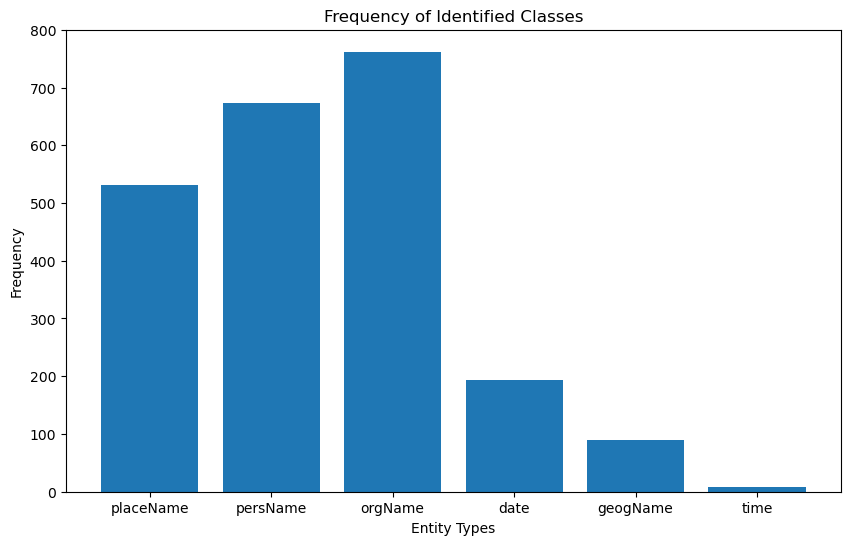

In [6]:
#Wykres liczby wystąpień elementów należących do danej klasy
plt.figure(figsize=(10, 6))
plt.bar(classes.keys(), [classes[key][1] for key in classes.keys()])
plt.title("Frequency of Identified Classes")
plt.xlabel("Entity Types")
plt.ylabel("Frequency")
plt.show()

# Zadanie 7

In [7]:
#Wyświetlam top10 elementów dla każdej klasy
def display_top10_for_each_class(dict, print_elems_n):
    class_names = dict.keys()
    #iteruję po klasach
    for class_name in class_names:
        class_dict = dict[class_name][0]
        print(f"------------------------------------{class_name}------------------------------------")
        #sortuję listę named_entities dla danej klasy
        list = [(key, class_dict[key]) for key in class_dict.keys()]
        list.sort(key=lambda x: x[1], reverse=True)
        # wyświetlam min(10, liczba_elementów_list) elementów z danej klasy, po posortowaniu
        for i in range(min(print_elems_n, len(list))):
            print(f"  {list[i][0]}: {list[i][1]}")

In [8]:
display_top10_for_each_class(classes, 10)

------------------------------------placeName------------------------------------
  USA: 80
  amerykański: 58
  Stany Zjednoczone: 39
  Indie: 10
  Amerykanin: 9
  Australia: 8
  chiński: 8
  Chiny: 8
  Wielki Brytania: 7
  nowy Jork: 6
------------------------------------persName------------------------------------
  Amazon: 29
  gdyby być: 13
  Trump: 11
  Huawei: 9
  Obama: 7
  sald: 7
  Hachette: 6
  Excel: 5
  Schwab: 5
  Fidelity: 5
------------------------------------orgName------------------------------------
  Google: 25
  IRA: 24
  CDO: 14
  ETF: 13
  Apple: 12
  SS: 8
  S&P: 8
  SPY: 8
  FICO: 8
  SIM: 8
------------------------------------date------------------------------------
  1099: 9
  2008 rok: 6
  1040: 5
  2016 rok.: 5
  2012 rok.: 4
  2010: 4
  grudzień: 4
  rok 90.: 4
  2015 rok: 4
  2016 rok: 4
------------------------------------geogName------------------------------------
  Europa: 10
  europejski: 10
  Azja: 4
  Wall Street: 3
  Ziemia: 3
  Trieu: 3
  IGCSE: 2

# Zadanie 8

In [9]:
# wyświetlam top50 elementów ogólnie
def display_top_50_elements(dict, n_elements):
    # lista, zawierająca [miejsce_na_rank, konkretny_named_entity, nazwę_klasy, liczbę_wystąpnień_named_entity]
    list = [[[0, element, class_key, dict[class_key][0][element]] for element in dict[class_key][0].keys()] for class_key in dict.keys()]
    
    #lista zostaje spłaszczona, gdyż wygląda tak: [[krotka_named_entity_z_klasy1, krotka_named_entity_z_klasy1], [krotka_named_entity_z_klasy2, krotka_named_entity_z_klasy2]....]
    res = []
    for list_for_class in list:
        for element in list_for_class:
            res.append(element)
    # sortuję po elemencie z id 4 z krotki, po liczbie_wystąpnień_named_entity
    res.sort(key=lambda x: x[3], reverse=True)
    for i in range(n_elements):
        res[i][0] = i
    #wyświetlam tabelę
    print(tabulate(res[:n_elements], ["rank", "name", "type", "count"], tablefmt="grid"))

In [10]:
display_top_50_elements(classes, 50)

+--------+-------------------+-----------+---------+
|   rank | name              | type      |   count |
+========+===================+===========+=========+
|      0 | USA               | placeName |      80 |
+--------+-------------------+-----------+---------+
|      1 | amerykański       | placeName |      58 |
+--------+-------------------+-----------+---------+
|      2 | Stany Zjednoczone | placeName |      39 |
+--------+-------------------+-----------+---------+
|      3 | Amazon            | persName  |      29 |
+--------+-------------------+-----------+---------+
|      4 | Google            | orgName   |      25 |
+--------+-------------------+-----------+---------+
|      5 | IRA               | orgName   |      24 |
+--------+-------------------+-----------+---------+
|      6 | CDO               | orgName   |      14 |
+--------+-------------------+-----------+---------+
|      7 | gdyby być         | persName  |      13 |
+--------+-------------------+-----------+----

# Zadanie 9

In [11]:
#filtruję zdania, posiadające co najmniej 2 named_entities
def has_multiple_entity_types(doc):
    types = {ent.label_ for ent in doc.ents}
    return len(types) > 1

sentences_with_entities = []
for document in tqdm(df_random.iloc, desc = "Processing: ", total=len(df_random)):
    doc = nlp(document.text)
    for sent in doc.sents:
        if has_multiple_entity_types(sent):
            sentences_with_entities.append(sent)

Processing:   0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
print(sentences_with_entities[:5])

[I to wiąże Stany Zjednoczone, tak jak na przykład Słowację, [blokując ich prawo do przystępnej opieki zdrowotnej] (http://www.italaw.com/sites/default/files/case-documents/italaw3206.pdf ), ponieważ firma ubezpieczeniowa po cichu, w niewidoczny sposób sfinalizowała NAJWYŻSZE prawo do ogromnych odszkodowań, w zasadzie darmowych pieniędzy., A może powinienem po prostu użyć obliczenia odsetek w Google i oczekiwać, że średni rynkowy zwrot z moich depozytów będzie tam w 2045 roku., Jeśli na Twoim koncie pojawi się podejrzana aktywność, zostanie ona zgłoszona do jednostki zajmującej się praniem pieniędzy w Departamencie Skarbu USA, która może przejść przez traktaty, które Stany Zjednoczone mogą mieć z Twoim krajem ojczystym (umowa podatkowa, umowa o ekstradycji itp.) ., Firmy IT takie jak PWC, BoozAllen, Capgemini, Cognizant i Accenture byłyby lepsze., prawdopodobnie nie tylko usunąć go z dochodu podlegającego opodatkowaniu, prawdopodobnie istnieje formularz podobny do amerykańskiego formul

In [13]:
from spacy import displacy
options = {
    "ents": ["orgName", "placeName", "geogName", "time", "date", "persName"],  # Specify which entity types to include
    "colors": {"orgName": "aqua", "placeName": "limegreen", "geogName": "yellow", "time": "red", "date": "orange", "persName": "pink"}  # Customize entity colors
}


# Display the formatted sentences
for i, sent in enumerate(sentences_with_entities[:5], 1):
    str = displacy.render(sent, style = "ent", jupyter = True, options = options)

## Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?

Zdecydowanie lepsze wyniki zostały osiągnięte dla metody wykorzystującej NER. Uzyskane named entites były pogrupowane, co pozwala je lepiej przeanalizować. Zliczanie named entities za pomocą wielkich liter, spowoodowało też wychwycenie słów takich jak: "Twój", czy "Ty", które nie są named entity, ale występują w środku zdania zapisane wielką literą na początku.

## What are the drawbacks of the method based on capital letters?

Zdecydowanym minusem jest istnienie słów takich jak "Twój", "Ty", "Ciebie", które nie są named entities. Często w nazwach własnych występuje również litera "i", która w zaproponowanej implementacji spowoduje rozdzielenie named entity na 2 osobne byty, na przykład: "Ministerstwo Rozwoju i Technologii" zostanie zapisane jako: "Ministerstwo Rozwoju", "Technologii". Takie podejście jakkolwiek ma pewien sens w języku polskim, to nie można go zastosować uniwersalnie. Na przykład w języku niemieckim, każdy rzeczownik jest pisany wielką literą, przez co korzystając z tej metody, wyłapalibyśmy wszystkie rzeczowniki. Nie jest to zatem metoda uniwersalna.

## What are the drawbacks of the method based on NER?

Użycie NER'a posiada bardzo wiele plusów. Wyłapywane są rzeczywiście elementy będące named entities. Natomiast metoda nie jest niestety idealna i w dalszym ciągu jest możliwość jej ulepszania. Słowa takie jak "Stany Zjednoczone" i "USA" powinny zostać w idealnym świecie zaklasyfikowane jako ten sam obiekt. Użyty przeze mnie NER niestety tego nie potrafi. Warto dodatkowo wspomnieć, że słowa takie jak "Wołodymy Zełesnki" i "Zełenski", a nawet "Prezydent Ukrainy" odnoszą się do jednej i tej samej osoby, jednak wymagana jest wiedza o świecie, wiedza historyczna, aby być w stanie je odpowienio połączyć.

## Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

Bardzo trudno stwierdzić z którą kategorią named entity NER radzi sobie najlepiej, gdyż nie posiadam metryki zdolnej to ocenić, tak więc moja ocena będzie jedynie subiektywną opinią. Według mnie NER poradził sobie dobrze z grupą **orgName**. Elementy z grup **persName**, **placeName**, oraz **geogName** były często w błędnie zaklasyfikowane, np. "Wall Street" jako geogName, gdy wiadomo, że jest to orgName. W mojej opinii bardzo słabo model radzi sobie z datami, co widać nawet na przykładzie 5 zdań powyżej, gdzie liczba 1116 została zaklasyfikowana jako data. Jednak w każdej klasie możemy wyszczególnić elementy, które zostały błędnie zaklasyfikowane.

## Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?

Jak napisałem we wnioskach powyżej, uważam, że NER nie jest wystarczający do zidentyfikowania różnych wystąpień tej samej named entity, na przykład "USA" i "Stany Zjednoczone" zostaje zaklasyfikowane jako dwie odrębne named entities. Często też słowa takie jak "US" zostają zaklasyfikowane jako **geogName**, gdy na przykład powinny zostać zaklasyfikowane jako **orgName**. Jedyne narzędzie, o którym wiem, które może sobie poradzić z tym zagadnieniem jest model językowy, który do analizy named entities weźmie pod uwagę szerszy kontekst, a nie jedynie wyrazy jako odrębne tokeny jak robi to NER.

## Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?

Mogę wyobrazić sobie narzędzie pozwalające analizować dane i wiadomości na temat konkretnej spółki. Załóżmy, że interesuje mnie spółka **Facebook**. Korzystając z NER, mogę regularnie ściągać z dostępnych mainstreamowych mediów i popularnych kont na X(Twitter) wiadomości, które następnie będę analizował przy pomocy NER, w poszukiwaniu named entity **Facebook**. Dzięki takiemu zabiegowi będę w stanie odfiltrować jedynie wiadomości które mają dla mnie znaczenie.

Podobna sytuacja ma miejsce, gdy interesują mnie wiadomości na przykład na temat USA, lub innego kraju na świecie. NER ma tutaj dużo większe pole do popisu, gdyż jak można zobaczyć w zrealizowanym zadaniu, słowo "USA" występuje bardzo często w różnych formach i dobrze wytrenowany NER, który umiałby wszystkie te formy połączyć w jedno, bardzo pomógłby w realizacji tego zadania.

Kolejnym przykładem mogłoby być użycie NER'a do napisania wirtualnego asystenta. Jeżeli prosilibyśmy go np. o wyznaczenie drogi do Melbourne, mógłby skorzystać z NER'a aby określić, czy Melbourne to miasto, centrum handlowe, czy też imię znajomego i w zależności od wyniku zaplanować trasę podróży. 